In [1]:
import os, h5py, pickle
import numpy as np
import healpy as hp
import matplotlib.pyplot as plt

from msfm.utils import files, cross_statistics, scales
from msi.utils import input_output

In [2]:
metainfo = np.load("/global/homes/a/athomsen/multiprobe-simulation-forward-model/data/CosmoGridV11_original_metainfo.npy")
grid_selection = metainfo["sobol_index"] != -999

sobols = metainfo["sobol_index"][grid_selection][::20]
Oms = metainfo["Om"][grid_selection][::20]
s8s = metainfo["s8"][grid_selection][::20]
S8s = s8s * np.sqrt(Oms / 0.3)

In [3]:
metacal_bias_file = "/global/homes/a/athomsen/multiprobe-simulation-forward-model/data/metacal_biases_buzzard_0.pkl"
with open(metacal_bias_file, "rb") as f:
    metacal_bias_dict = pickle.load(f)

In [4]:
metacal_biases = np.zeros((len(sobols), 4))
for i, sobol in enumerate(sobols):
    metacal_biases[i] = np.array(metacal_bias_dict[f"cosmo_{sobol:06}"])

In [5]:
mask = np.abs(s8s - 0.84) < 1e-2
metacal_bias_slice = metacal_biases[mask]

print(metacal_bias_slice.shape)

(74, 4)


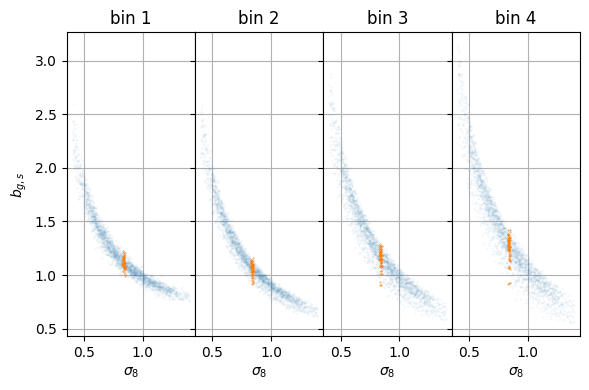

In [6]:
# fig, ax = plt.subplots(figsize=(full_linewidth, 0.5*half_linewidth), ncols=4, sharex=True, sharey=True)
fig, ax = plt.subplots(figsize=(6,4), ncols=4, sharex=True, sharey=True)

for i in range(4):
    ax[i].scatter(s8s, metacal_biases[:,i], s=0.1, alpha=0.1, zorder=10)
    ax[i].scatter(s8s[mask], metacal_bias_slice[:,i], s=0.1, alpha=1.0, zorder=10)
    ax[i].set(xlabel="$\sigma_8$", title=f"bin {i+1}")
    ax[i].grid(True, zorder=0)

ax[0].set(ylabel="$b_{g,s}$")
fig.tight_layout()
plt.subplots_adjust(wspace=0)

1.13, 1.03, 1.22
1.07, 0.96, 1.17
1.17, 1.01, 1.33
1.25, 1.03, 1.47


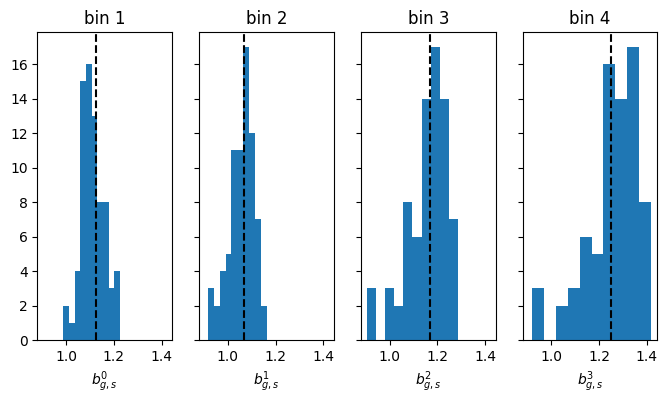

In [12]:
fig, ax = plt.subplots(figsize=(8,4), ncols=4, sharex=True, sharey=True)

bgs_fidu = [1.12507858, 1.06614326, 1.16939598, 1.25172333]
for i in range(4):
    ax[i].hist(metacal_bias_slice[:,i], bins=10)
    ax[i].axvline(bgs_fidu[i], color="k", linestyle="--")
    ax[i].set(title=f"bin {i+1}", xlabel=r"$b_{g,s}^" + f"{i}$")

    sigma = np.std(metacal_bias_slice[:,i])
    # print(f"{bgs_fidu[i]:.2f} ± 2 sigma = {2*sigma:.2f}")

    bgs_low = bgs_fidu[i] - 2 * sigma
    bgs_high = bgs_fidu[i] + 2 * sigma
    print(f"{bgs_fidu[i]:.2f}, {bgs_low:.2f}, {bgs_high:.2f}")